# Walmart
## Problem Statement

The Management team at Walmart Inc. wants to analyze the customer purchase behavior (specifically, purchase amount) against the customer’s gender and the various other factors to help the business make better decisions. They want to understand if the spending habits differ between male and female customers: Do women spend more on Black Friday than men? 

### Assume 50 million customers are male and 50 million are female in population

In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm, geom, binom
import math

# Data loading and creating netflix data frame

In [3]:
# Load Walmart data and create a dataframe on it
df = pd.read_csv('https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/293/original/walmart_data.csv?1641285094')

# Exploratory analysis of data frame (from below code)
### Insight : 
    - 10 Columns and 550068 rows are available in the data.
    - 5 Columns are with Object data type and remaining 5 columns are with INT data type
    - Data doesnt contain any null values in it
    - Transaction details of the users are available in the data.
    - 5 lakh number of rows are provide, which is subset of main population.

In [4]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


## There is no null available in any column of the data (from below code)

In [6]:
df.isna().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category              0
Purchase                      0
dtype: int64

 ## Purchase column Standard deviation is more when compared to other columns

In [8]:
df.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
User_ID,550068.0,NaN,NaN,NaN,1003028.842401,1727.591586,1000001.0,1001516.0,1003077.0,1004478.0,1006040.0
Product_ID,550068,3631,P00265242,1880,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,550068,2,M,414259,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,550068,7,26-35,219587,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Occupation,550068.0,NaN,NaN,NaN,8.076707,6.52266,0.0,2.0,7.0,14.0,20.0
City_Category,550068,3,B,231173,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Stay_In_Current_City_Years,550068,5,1,193821,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Marital_Status,550068.0,NaN,NaN,NaN,0.409653,0.49177,0.0,0.0,0.0,1.0,1.0
Product_Category,550068.0,NaN,NaN,NaN,5.40427,3.936211,1.0,1.0,5.0,8.0,20.0
Purchase,550068.0,NaN,NaN,NaN,9263.968713,5023.065394,12.0,5823.0,8047.0,12054.0,23961.0


In [14]:
print('Shape of dataframe is', df.shape)
print('no of elements of dataframe is', df.size)
print('dimension of dataframe is', df.ndim)
print('number of rows is ', len(df))

Shape of dataframe is (550068, 10)
no of elements of dataframe is 5500680
dimension of dataframe is 2
number of rows is  550068


## Conversion categorical column to category datatype
#### Insight : 
    Product_ID, Gender, Age, City_Category, Marital_Status, Product_Category and Stay_In_Current_City_Years columns need to be converted to 'Category' datatype from Object datatype.

In [6]:
df['Product_ID'] =df['Product_ID'].astype(dtype = 'category')
df['Gender'] = df['Gender'].astype(dtype = 'category')
df['Age'] = df['Age'].astype(dtype = 'category')
df['City_Category'] = df['City_Category'].astype(dtype = 'category')
df['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years'].astype(dtype = 'category')
df['Marital_Status'] = df['Marital_Status'].astype(dtype = 'category')
df['Product_Category'] = df['Product_Category'].astype(dtype = 'category')

# 2.	Non-Graphical and Graphical Analysis

### User_ID  column
#### Insight : 
     - 5891 number of user's transaction are available.
     - User id starts from 1000001 to 1006040
     - As per Histogram, minimum of 4000 transaction is availalbe for each user.
     - 50% of users are between 1.001516e+06 and 1.004478e+06
#### Recommendation:
    - Most of the user's have min 4000 transaction, this minimum trasaction to be increased to achieve more income by providing more offers / coupons/ adding more product range.

In [23]:
df['User_ID'].nunique()

5891

Text(0.5, 1.0, 'User id analysis')

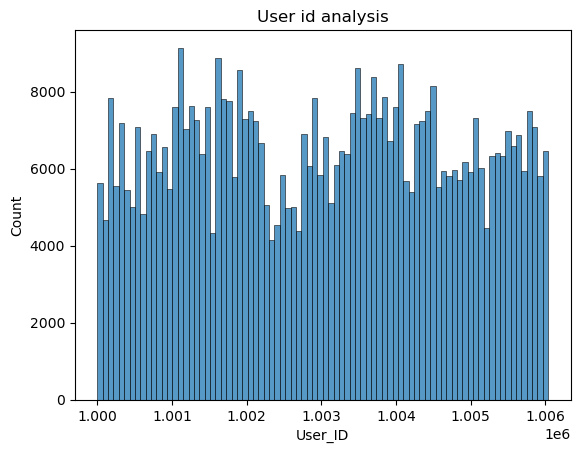

In [95]:
sns.histplot(data = df, x = 'User_ID')
plt.title('User id analysis')

In [29]:
print('Maximum value of User id', df['User_ID'].max())
print('Minimum value of User id', df['User_ID'].min())

Maximum value of User id 1006040
Minimum value of User id 1000001


Text(0.5, 1.0, 'User_ID column analysis and outlier detection')

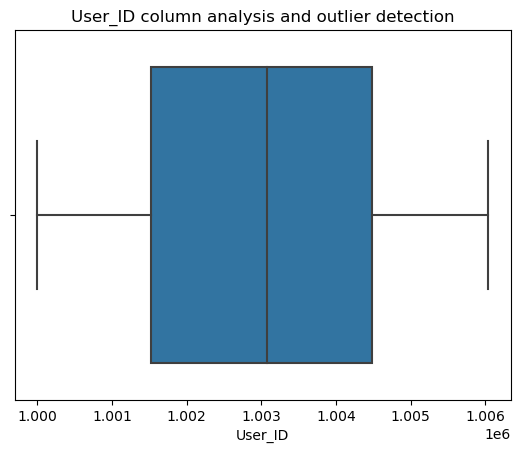

In [94]:
sns.boxplot(data = df, x = 'User_ID')
plt.title('User_ID column analysis and outlier detection')

### Product_ID  column
#### Insight : 
     - 3631 number of unique product's are available in this data.
     - Maximum selling product is P00265242 which as 1880 transaction and accounts to 0.36% of total trasaction.
#### Recommendation:
    - Few products have only 1 trasaction, so if this is possible to remove in the inventory and we can avoid inventory cost. 

In [18]:
df['Product_ID'].nunique()

3631

In [19]:
df['Product_ID'].unique()

array(['P00069042', 'P00248942', 'P00087842', ..., 'P00370293',
       'P00371644', 'P00370853'], dtype=object)

In [39]:
df['Product_ID'].value_counts() 

P00265242    1880
P00025442    1615
P00110742    1612
P00112142    1562
P00057642    1470
             ... 
P00068742       1
P00012342       1
P00162742       1
P00091742       1
P00231642       1
Name: Product_ID, Length: 3631, dtype: int64

Text(0.5, 1.0, 'Product_ID wise count')

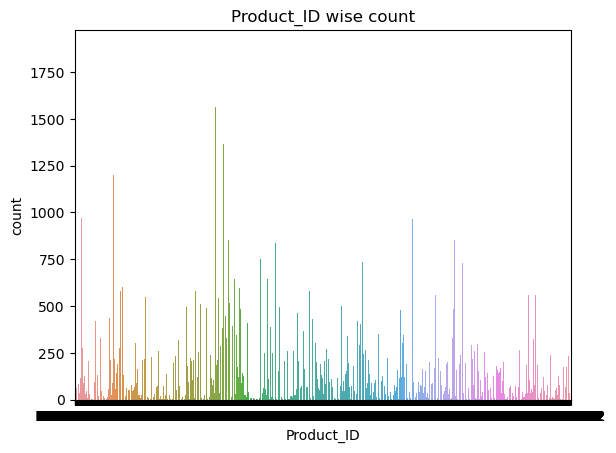

In [93]:
sns.countplot(data = df, x = 'Product_ID')
plt.title('Product_ID wise count')

### Gender  column
#### Insight : 
     - Gender columns have 2 category which is F and M.
     - 75% trascation are from Gender Males.
#### Recommendation:
    - Females user transaction to be increase, by providing addition products related to females.
    - For every transaction, some incentive to be provided and this will encourage more trascation.

In [41]:
df['Gender'].unique()

['F', 'M']
Categories (2, object): ['F', 'M']

In [44]:
df['Gender'].value_counts(normalize = True) * 100

M    75.310507
F    24.689493
Name: Gender, dtype: float64

Text(0.5, 1.0, 'Gender wise count')

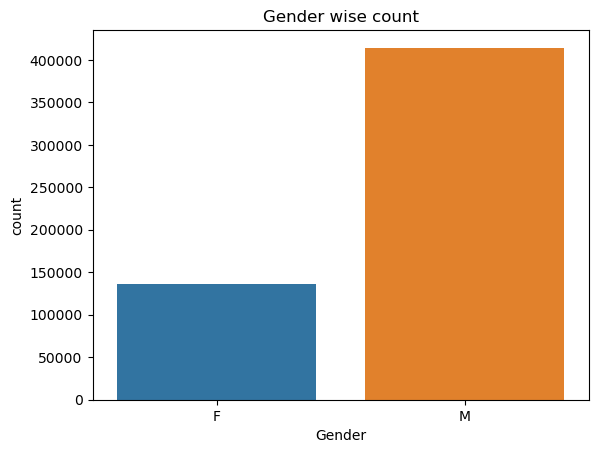

In [92]:
sns.countplot(data = df, x = 'Gender')
plt.title('Gender wise count')

### Age  column
#### Insight : 
     - Age columns have 7 category.
     - 39% trascation are from 26-35 bins.
     - Majority of transaction are between 18 - 45 age.
#### Recommendation:
    - Provide ads and marketing to be done on these age group and they are the ones will be purchasing the products.

In [47]:
df['Age'].unique()

['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25']
Categories (7, object): ['0-17', '18-25', '26-35', '36-45', '46-50', '51-55', '55+']

In [48]:
df['Age'].nunique()

7

In [51]:
df['Age'].value_counts(normalize = True) * 100

26-35    39.919974
36-45    19.999891
18-25    18.117760
46-50     8.308246
51-55     6.999316
55+       3.909335
0-17      2.745479
Name: Age, dtype: float64

Text(0.5, 1.0, 'Age wise count')

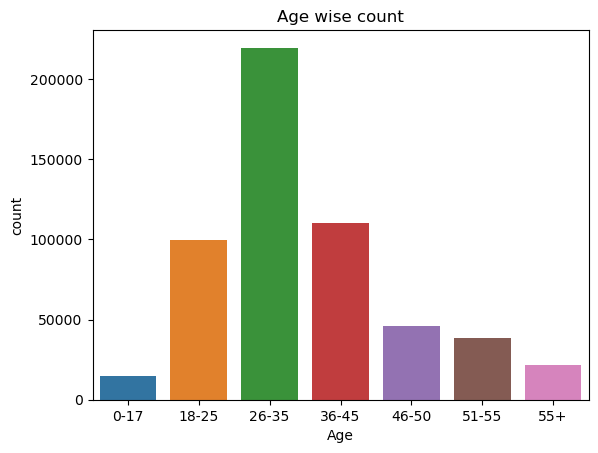

In [53]:
sns.countplot(data = df, x = 'Age')
plt.title('Age wise count')

### Occupation  column
#### Insight : 
     - Occupation columns have 21 category.
     - Occupation 4, 0, 7, 1, 17 have majority of transaction.
   
#### Recommendation:
    - Occupation 4, 0, 7, 1, 17 are potential customer. So, Provide ads and marketing to be done on these group.

In [54]:
df['Occupation'].unique()

array([10, 16, 15,  7, 20,  9,  1, 12, 17,  0,  3,  4, 11,  8, 19,  2, 18,
        5, 14, 13,  6], dtype=int64)

In [55]:
df['Occupation'].nunique()

21

In [56]:
df['Occupation'].value_counts(normalize = True) * 100

4     13.145284
0     12.659889
7     10.750125
1      8.621843
17     7.279645
20     6.101427
12     5.668208
14     4.964659
2      4.833584
16     4.612339
6      3.700452
3      3.208694
10     2.350618
5      2.213726
15     2.211545
11     2.106285
19     1.538173
13     1.404917
18     1.203851
9      1.143677
8      0.281056
Name: Occupation, dtype: float64

Text(0.5, 1.0, 'Occupation wise count')

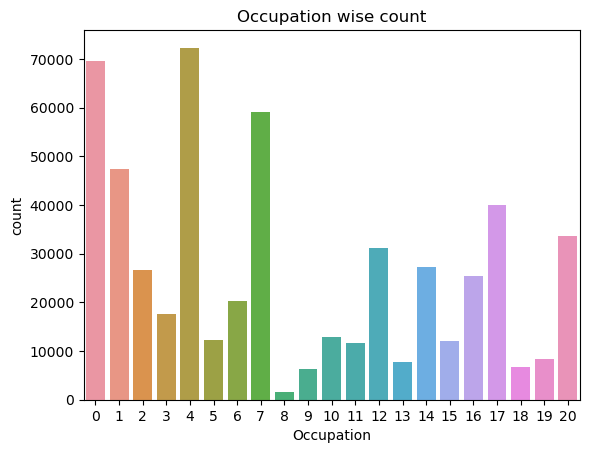

In [57]:
sns.countplot(data = df, x = 'Occupation')
plt.title('Occupation wise count')

Text(0.5, 1.0, 'Occupation column analysis and outlier detection')

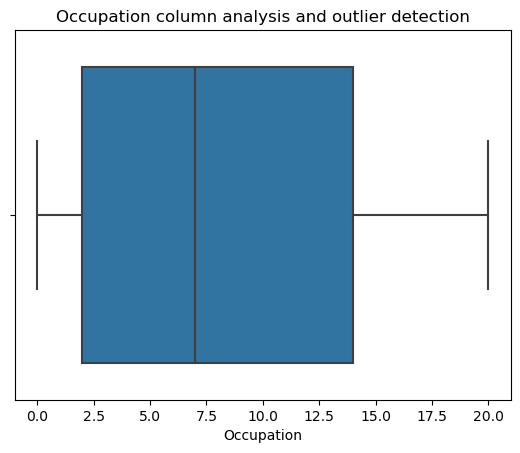

In [59]:
sns.boxplot(data = df, x = 'Occupation')
plt.title('Occupation column analysis and outlier detection')

### City_Category  column
#### Insight : 
     - City_Category columns have 3 category (A,B,C).
     - B city category is majority of transaction.
   
#### Recommendation:
    - B city category as most customers. So,Provide ads, offers and marketing to be done on these group.

In [62]:
df['City_Category'].unique()

['A', 'C', 'B']
Categories (3, object): ['A', 'B', 'C']

In [63]:
df['City_Category'].value_counts(normalize = True) * 100

B    42.026259
C    31.118880
A    26.854862
Name: City_Category, dtype: float64

Text(0.5, 1.0, 'City_Category wise count')

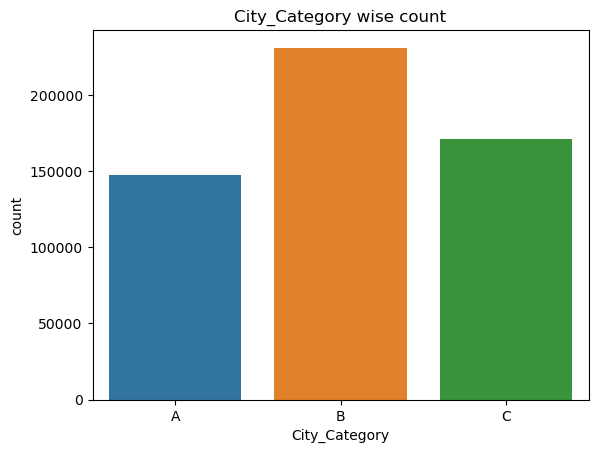

In [64]:
sns.countplot(data = df, x = 'City_Category')
plt.title('City_Category wise count')

### Stay_In_Current_City_Years  column
#### Insight : 
     - Stay_In_Current_City_Years columns have 3 category (A,B,C).
     - B city category is majority of transaction.
   
#### Recommendation:
    - B city category as most customers. So,Provide ads, offers and marketing to be done on these group.
    - Other cities to be focused to increase transaction by adding offers, more purchase to more discounts.

In [65]:
df['Stay_In_Current_City_Years'].unique()

['2', '4+', '3', '1', '0']
Categories (5, object): ['0', '1', '2', '3', '4+']

In [66]:
df['Stay_In_Current_City_Years'].value_counts(normalize = True) * 100

1     35.235825
2     18.513711
3     17.322404
4+    15.402823
0     13.525237
Name: Stay_In_Current_City_Years, dtype: float64

Text(0.5, 1.0, 'Stay_In_Current_City_Years wise count')

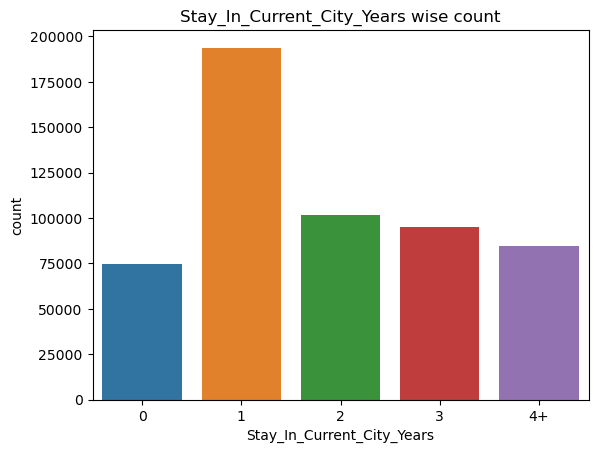

In [67]:
sns.countplot(data = df, x = 'Stay_In_Current_City_Years')
plt.title('Stay_In_Current_City_Years wise count')

### Marital_Status  column
#### Assumption:
    - details for category is not available in the input. So, assuming '0' as single and '1' as married

#### Insight : 
     - Marital_Status columns have 2 category (0,1).
     - '0' category as majority of transaction.
   
#### Recommendation:
    - 0 category as most customers. So,Provide ads, offers and marketing to be done on these group.
    - 1 category to be focused to increase transaction by adding offers, more purchase to more discounts.

In [70]:
df['Marital_Status'].unique()

[0, 1]
Categories (2, int64): [0, 1]

In [72]:
df['Marital_Status'].value_counts(normalize = True) * 100

0    59.034701
1    40.965299
Name: Marital_Status, dtype: float64

Text(0.5, 1.0, 'Marital_Status wise count')

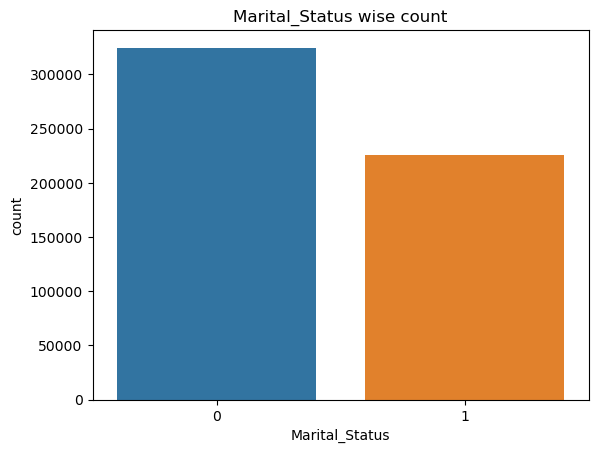

In [73]:
sns.countplot(data = df, x = 'Marital_Status')
plt.title('Marital_Status wise count')

### Product_Category  column

#### Insight : 
     - Product_Category columns have 20 category.
     - 5, 1 , 8 category as majority of transaction. Almost of 72% of transaction are with these category
   
#### Recommendation:
    - 5, 1, 8 category as most customers. So,Provide ads, offers and marketing to be done on these group to increase sales.
    - 17, 9 category are very less transaction, if possible to remove the these category to save cost and same cost can be added in most sold category.
    - Category 11,2,6,3,4 in these we can focus to have more sales like buy one get one offer, discounts etc...

In [78]:
df['Product_Category'].unique()

[3, 1, 12, 8, 5, ..., 10, 17, 9, 20, 19]
Length: 20
Categories (20, int64): [1, 2, 3, 4, ..., 17, 18, 19, 20]

In [81]:
df['Product_Category'].value_counts(normalize = True) * 100

5     27.438971
1     25.520118
8     20.711076
11     4.415272
2      4.338373
6      3.720631
3      3.674637
4      2.136645
16     1.786688
15     1.143495
13     1.008784
10     0.931703
12     0.717548
7      0.676462
18     0.568112
20     0.463579
19     0.291419
14     0.276875
17     0.105078
9      0.074536
Name: Product_Category, dtype: float64

Text(0.5, 1.0, 'Product_Category wise count')

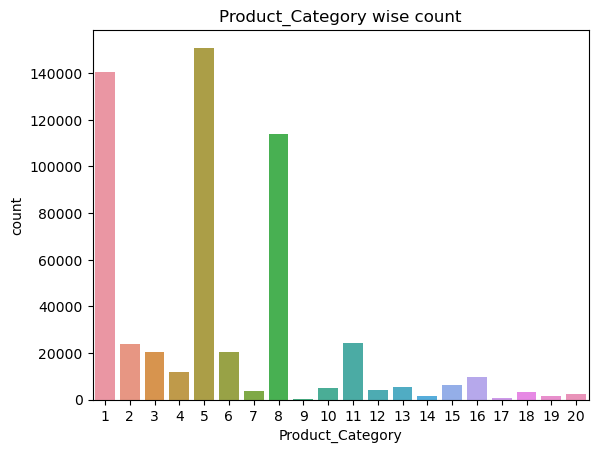

In [80]:
sns.countplot(data = df, x = 'Product_Category')
plt.title('Product_Category wise count')

### Purchase   column

#### Insight : 
     - Purchase columns have 18105 unique transaction.
     - Majority of the transaction have happened in this range 5000 to 20000 amount (as per histogram).
     - 50% percentile data is from 5823 to 12054 amount
     - Max amount - 23961 amount
     - Min amount - 12 amount
     - Mean - 9263 and Standard deviation - 5023
        
#### Recommendation:
    - Add more product in the these 5000 to 20000 amount, Most of the people can affort these range.
    - Add a discount for purchase amount is more than 10000, so that sales increase and profit increases.

In [96]:
df['Purchase'].describe()

count    550068.000000
mean       9263.968713
std        5023.065394
min          12.000000
25%        5823.000000
50%        8047.000000
75%       12054.000000
max       23961.000000
Name: Purchase, dtype: float64

In [83]:
df['Purchase'].unique()

array([ 8370, 15200,  1422, ...,   135,   123,   613], dtype=int64)

In [84]:
df['Purchase'].nunique()

18105

Text(0.5, 1.0, 'Purchase analyis')

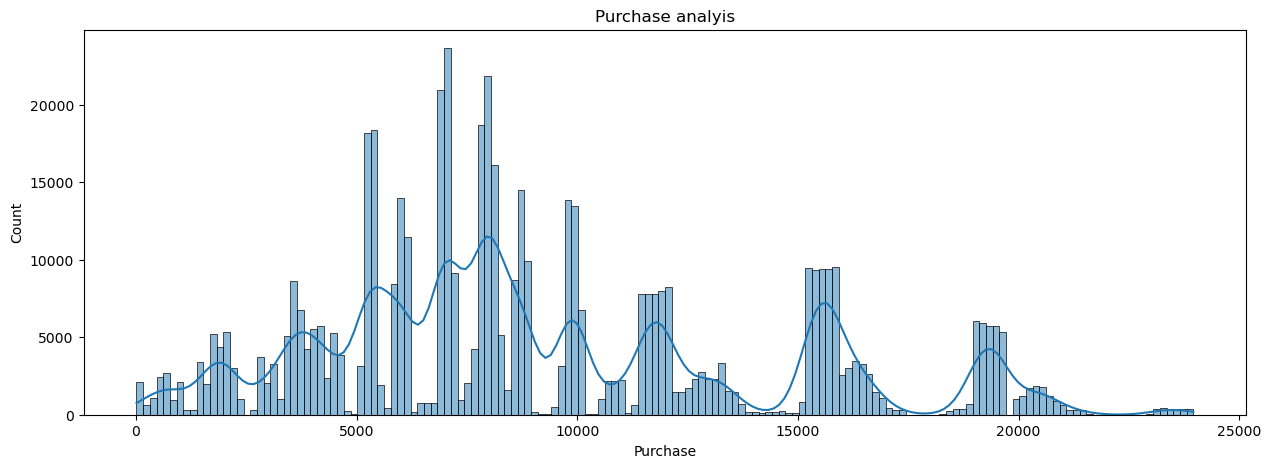

In [88]:
plt.figure(figsize = (15,5))
sns.histplot(data = df, x = 'Purchase', kde = True)
plt.title('Purchase analyis')

Text(0.5, 1.0, 'Purchase column analysis and outlier detection')

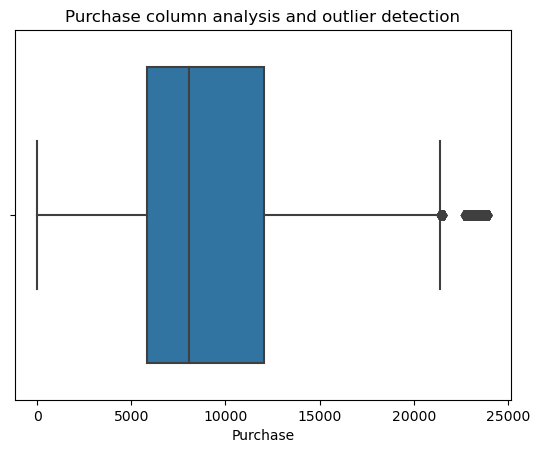

In [91]:
sns.boxplot(data = df, x = 'Purchase')
plt.title('Purchase column analysis and outlier detection')

# Bivariate plot

#### Insights:
     - Purchase to Gender:
         - Median is same for Female and male purchases
         - 75 percentile of Male purchase is more than female purchase
     - Purchase to Age:
         - Median of all age bins as same median purchase
         - Age bin 51 -55 as higher 75% when compared to other bins
     - Purchase to Martial status:
         - Purchase of both married and single looks similar
     - Purchase to City category:
         - City 'c'category as more wider 50 percentile data(25% - 75%).
     - Purchase to gender and count comparision:
         - Purchase of male and female is directly proportional to count of people.
     - Purchase to Stay_In_Current_City_Years:
         - purchase of all person with number of years are all same.
     - Purchase to Product_Category:
         - 6, 7, 10, 15, 16, 14, 9 product category have high median purchase.
#### Recommendation
    - Male tend to spend more compared to female, for higher purchase customer user can be given offers to attract.
    - Recommendation of products to all age group, as all age bins users tend to purchase are same median.
    - Even wrt Martial status of user wont make have major impact to purchase. recommendation of product should be same for all irrespective of martial status.
    - Add more product and offers to city 'C' cateogory as user tend to purchase more.
    - 6, 7, 10, 15, 16, 14, 9 product category as more purchases, add similar product of different for users to have many options to purchase with offers like buy 1 get 10% discount on second purchase.

Text(0.5, 1.0, 'Bivariate plot analysis of purchase and gender')

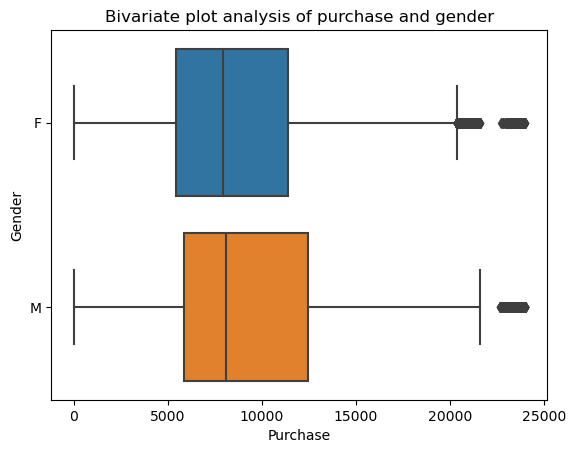

In [45]:
### Bivariate analysis of Purchase wrt Gender
sns.boxplot(data = df, x = 'Purchase', y = 'Gender')
plt.title('Bivariate plot analysis of purchase and gender')

Text(0.5, 1.0, 'Bivariate plot analysis of purchase and Age')

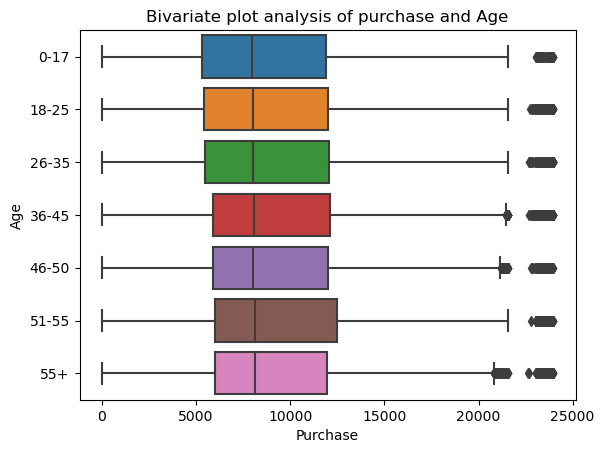

In [22]:
### Bivariate analysis of Purchase wrt age
sns.boxplot(data = df, x = 'Purchase', y = 'Age')
plt.title('Bivariate plot analysis of purchase and Age')

Text(0.5, 1.0, 'Bivariate plot analysis of purchase and Marital_Status')

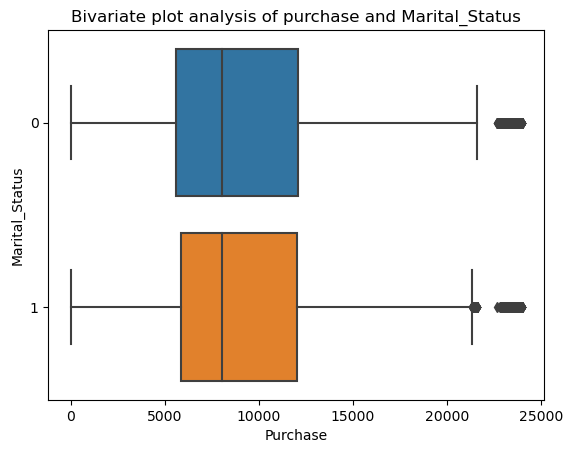

In [34]:
### Bivariate analysis of Purchase wrt Marital_Status
sns.boxplot(data = df, x = 'Purchase', y = 'Marital_Status')
plt.title('Bivariate plot analysis of purchase and Marital_Status')

Text(0.5, 1.0, 'Bivariate plot analysis of purchase and city')

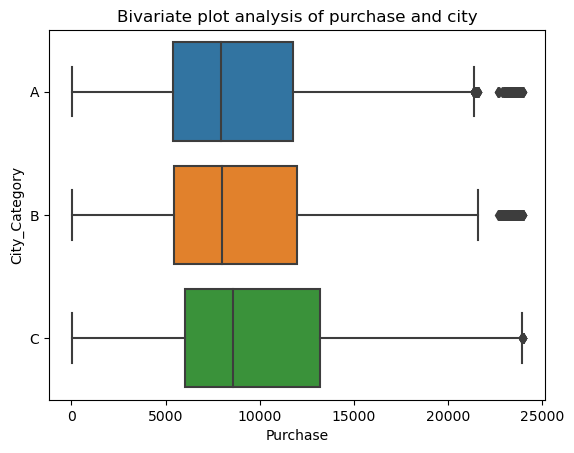

In [60]:
### Bivariate analysis of Purchase wrt City_Category
sns.boxplot(data = df, x = 'Purchase', y = 'City_Category')
plt.title('Bivariate plot analysis of purchase and city')

Text(0.5, 1.0, 'Gender wise count')

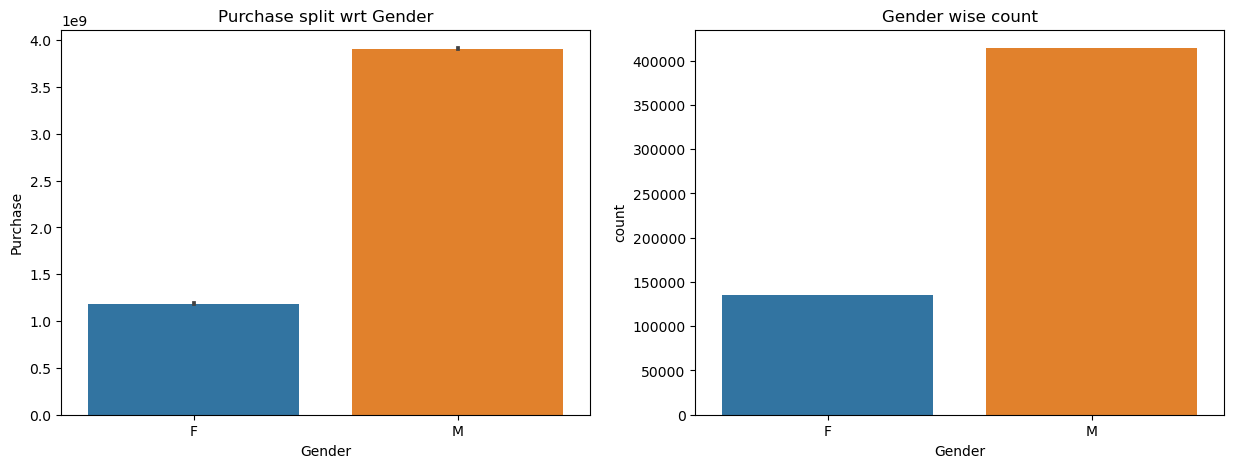

In [61]:
### Bivariate analysis of Purchase wrt Gender and count comparision
plt.figure(figsize = (15,5)) 
plt.subplot(1,2,1)
sns.barplot(data = df, x = 'Gender', y = 'Purchase', estimator = np.sum)
plt.title ('Purchase split wrt Gender')

plt.subplot(1,2,2)
sns.countplot(data =df , x = 'Gender')
plt.title('Gender wise count')

Text(0.5, 1.0, 'Bivariate plot analysis of purchase and Stay_In_Current_City_Years')

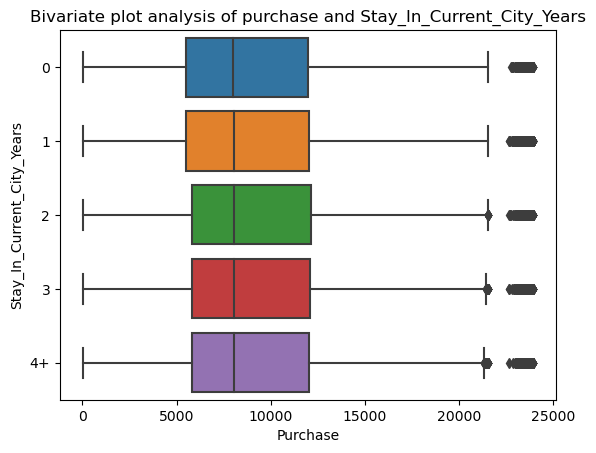

In [21]:
### Bivariate analysis of Purchase wrt Stay_In_Current_City_Years
sns.boxplot(data = df, x = 'Purchase', y = 'Stay_In_Current_City_Years')
plt.title('Bivariate plot analysis of purchase and Stay_In_Current_City_Years')

Text(0.5, 1.0, 'Bivariate plot analysis of purchase and Product_Category')

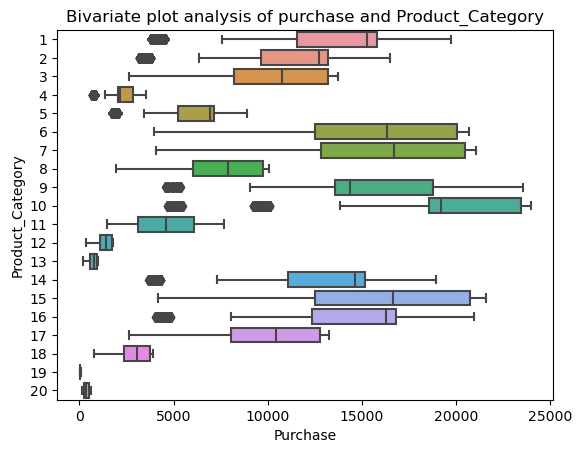

In [62]:
### Bivariate analysis of Purchase wrt Product_Category
sns.boxplot(data = df, x = 'Purchase', y = 'Product_Category')
plt.title('Bivariate plot analysis of purchase and Product_Category')

## Multivariate analysis
#### Insights:
    - Purchase wrt gender and martial status as no impact.
    - More age user 51-55, tend to purchase more when compared to other.
    - male user with all age bins tend to purchase more.
    - male in City 'c' category tend to purchase more.
#### Recommendation:
    - provide coupons, offers and discount to users in these category - age bin 51-55, city 'C' category and males as gender.

Text(0.5, 1.0, 'mulitvariate plot analysis of purchase and gender wrt Martial status')

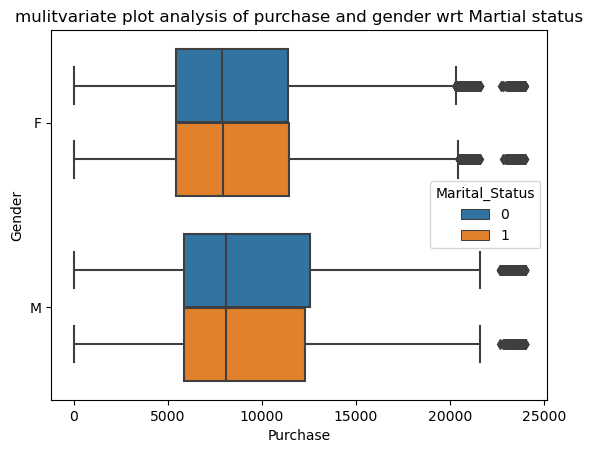

In [37]:
sns.boxplot(data = df, x = 'Purchase', y = 'Gender', hue = 'Marital_Status')
plt.title('mulitvariate plot analysis of purchase and gender wrt Martial status')

Text(0.5, 1.0, 'mulitvariate plot analysis of purchase and gender wrt Age')

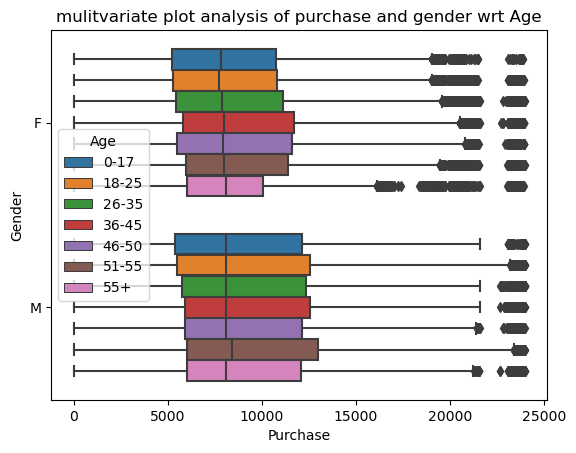

In [38]:
sns.boxplot(data = df, x = 'Purchase', y = 'Gender', hue = 'Age')
plt.title('mulitvariate plot analysis of purchase and gender wrt Age')

Text(0.5, 1.0, 'mulitvariate plot analysis of purchase and gender wrt City_Category')

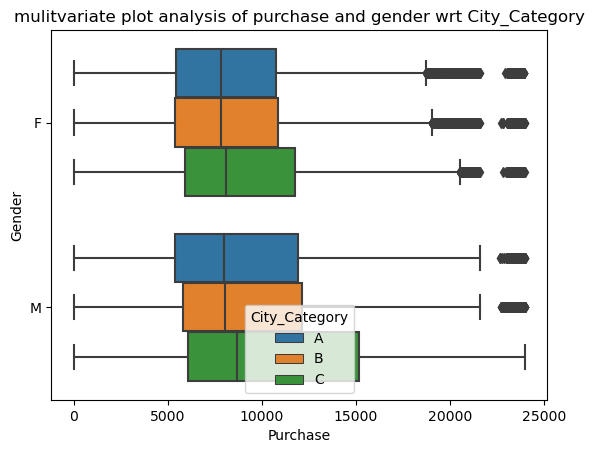

In [41]:
sns.boxplot(data = df, x = 'Purchase', y = 'Gender', hue = 'City_Category')
plt.title('mulitvariate plot analysis of purchase and gender wrt City_Category')

Text(0.5, 1.0, 'mulitvariate plot analysis of purchase and gender wrt Stay_In_Current_City_Years')

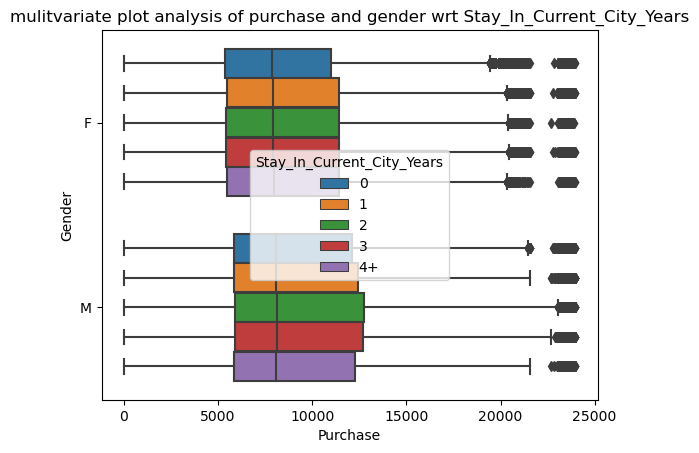

In [40]:
sns.boxplot(data = df, x = 'Purchase', y = 'Gender', hue = 'Stay_In_Current_City_Years')
plt.title('mulitvariate plot analysis of purchase and gender wrt Stay_In_Current_City_Years')

## correlation:
#### Observation:
    - As majority of data of categorical data, for correlation analysis we need Continous data .
    - Few columns have int as datatype, but user id and occupation cant be used for correlation and getting insight wont be that helpful.

C:\Users\trtej\AppData\Local\Temp\ipykernel_20360\1262443069.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True,cmap="Blues" , linewidth=.5)


<Axes: >

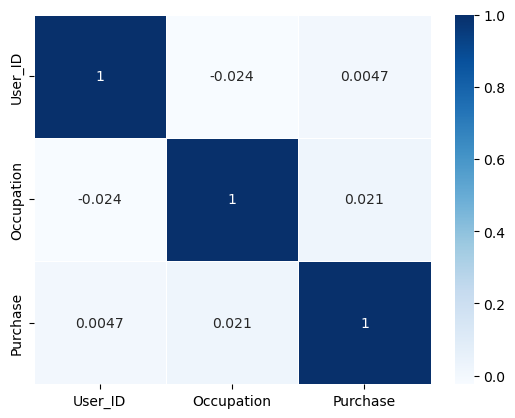

In [18]:
sns.heatmap(df.corr(), annot=True,cmap="Blues" , linewidth=.5)

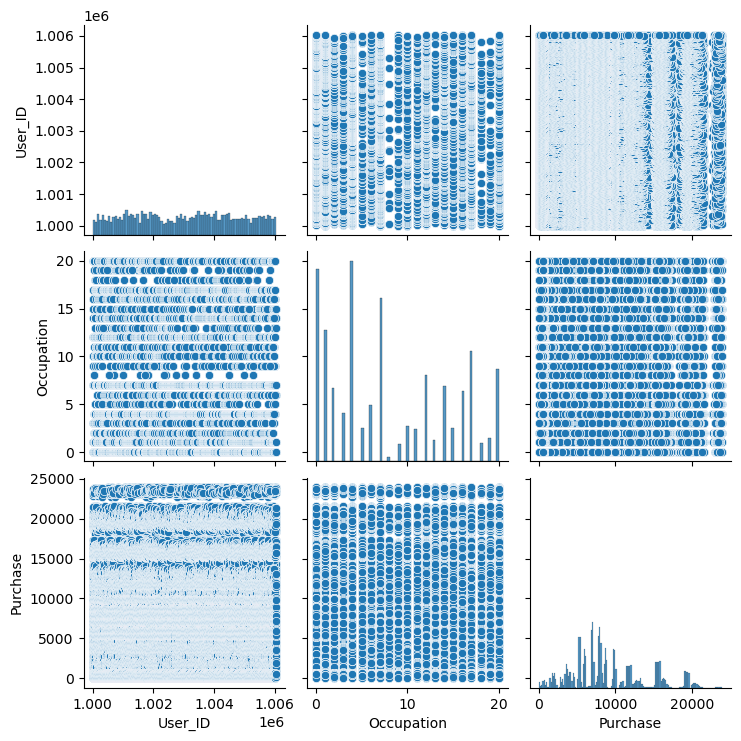

In [19]:
sns.pairplot(df)


### 3a. Tracking the amount spent per transaction of all the 50 million female customers, and all the 50 million male customers, calculate the average, and conclude the results.
### 3b. Inference after computing the average female and male expenses.

### Inferential statistics

#### Insights :
    - Based on Central limit theorem with sample size = 500 and number of trails = 500, Male population mean is 9438.47 and Female population mean is 8740.52.
    - Male standard deviation = 226.59, Female standard deviation = 214.03
    - Male user tend to purchase more when compared female user by about 700 amount difference. 
    - Female users have less standard deviation, so female try to purchase with 
#### Recommendation :
    - As per data, male user tend to purchase, add more product line where they can spend more.
    - Give offers to female user, so that they tend to purchase more.
    - With less standard deviation of female users, range of purchase is less and with offers this range can be increased

In [8]:
# for Female purchase avg
female_pur = df[df['Gender'] == 'F']['Purchase']

# for Male purchase avg
male_pur = df[df['Gender'] == 'M']['Purchase']

Text(0.5, 1.0, 'male mean counts / CLT')

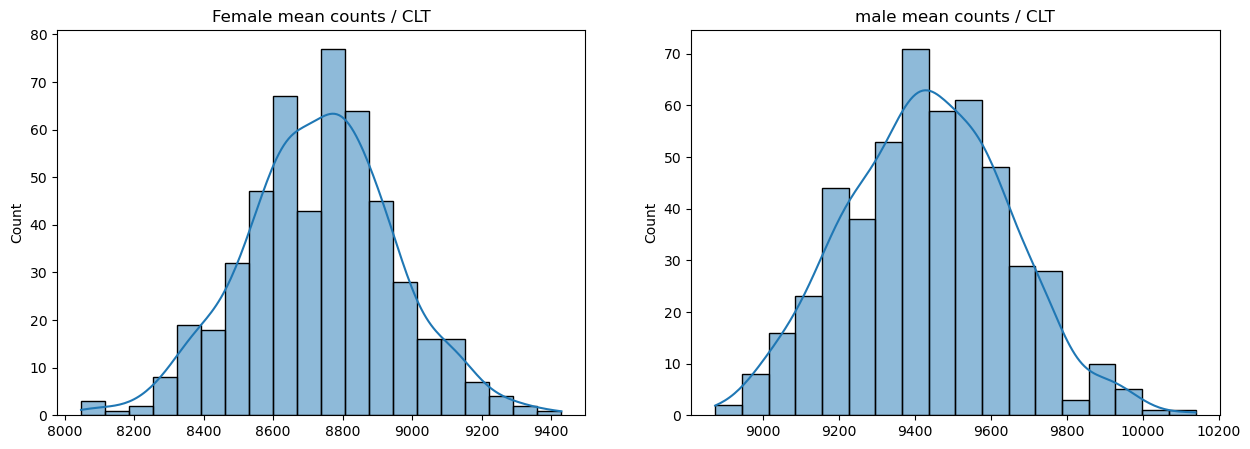

In [11]:
# Central limit theoren and plot
''' Tracking the amount spent per transaction of all the 50 million female customers, 
and all the 50 million male customers, calculate the average, and conclude the results.'''

sample_size = 500
no_of_trails = 500
sample_mean_female = []
sample_mean_male = []

# Female CLT
for i in range(no_of_trails):
    sm = female_pur.sample(sample_size).mean()
    sample_mean_female.append(sm)

# male CLT
for i in range(no_of_trails):
    sm = male_pur.sample(sample_size).mean()
    sample_mean_male.append(sm)
    
#plot
plt.figure(figsize = (15,5))

# Female hist
plt.subplot(1,2,1)    
sns.histplot(x = sample_mean_female, kde = True)
plt.title('Female mean counts / CLT')

# male Hist
plt.subplot(1,2,2)    
sns.histplot(x = sample_mean_male, kde = True)
plt.title('male mean counts / CLT')


In [10]:
# mean of means = population mean (male)
print('Male population mean is',round(pd.Series(sample_mean_male).mean(),2))
print('Male standard deviation is',round(pd.Series(sample_mean_male).std(),2))

# mean of means = population mean (female)
print('Female population mean is',round(pd.Series(sample_mean_female).mean(),2))
print('Female standard deviation is',round(pd.Series(sample_mean_female).std(),2))

Male population mean is 9444.97
Male standard deviation is 226.59
Female population mean is 8712.37
Female standard deviation is 214.03


### 3c. Use the sample average to find out an interval within which the population average will lie. Using the sample of female customers you will calculate the interval within which the average spending of 50 million male and female customers may lie.
##### Insights:
    - With 1 sample and size = 1000, comfidence interval of where population mean will lie is as mentioned below:
        - Female:
            - 68% confidence interval is [ 8664.99 , 8964.12 ]
            - 95% confidence interval is [ 8521.41 , 9107.7  ]
            - 99.7% confidence interval is [ 8365.87 , 9263.24 ]
        - Male:
            - 68% confidence interval is [ 9526.01 , 9860.73 ]
            - 95% confidence interval is [ 9365.34 , 10021.4 ]
            - 99.7% confidence interval is [ 9191.28 , 10195.46 ]
##### Recommendation:
    - With above confidence interval, male population mean will lie between 9365 to 10021 with 95% confidence.
    - With above confidence interval, female population mean will lie between 8521 to 9107 with 95% confidence.
    - So, male population mean is highter than female population mean. Add offers to male user so they tend to buy more products.

In [58]:
# Get 68%, 95% and 99.7% confidence inteval for female purchases
pur_fe = female_pur.sample(1000)
pur_fe_des = pur_fe.describe()

# standard error
se_pur_fe = pur_fe_des['std'] / math.sqrt(1000)

# 68% confidence of having female population mean in this range
print('68% confidence interval is [', round(pur_fe_des['mean'] - se_pur_fe,2), ',',  
      round(pur_fe_des['mean'] + se_pur_fe,2), ']')

# 95% confidence of having female population mean in this range
print('95% confidence interval is [', round(pur_fe_des['mean'] - (1.96*se_pur_fe),2), ',',  
      round(pur_fe_des['mean'] + (1.96 * se_pur_fe),2), ']')

# 99.7% confidence of having female population mean in this range
print('99.7% confidence interval is [', round(pur_fe_des['mean'] - (3*se_pur_fe),2),',',  
      round(pur_fe_des['mean'] + (3 * se_pur_fe),2),']')

68% confidence interval is [ 8664.99 , 8964.12 ]
95% confidence interval is [ 8521.41 , 9107.7 ]
99.7% confidence interval is [ 8365.87 , 9263.24 ]


In [59]:
# Get 68%, 95% and 99.7% confidence inteval for male purchases
pur_ma = male_pur.sample(1000)
pur_ma_des = pur_ma.describe()

# standard error
se_pur_ma = pur_ma_des['std'] / math.sqrt(1000)

# 68% confidence of having male population mean in this range
print('68% confidence interval is [', round(pur_ma_des['mean'] - se_pur_ma,2) ,',',  
      round(pur_ma_des['mean'] + se_pur_ma,2), ']')

# 95% confidence of having male population mean in this range
print('95% confidence interval is [', round(pur_ma_des['mean'] - (1.96*se_pur_ma),2), ',',  
      round(pur_ma_des['mean'] + (1.96 * se_pur_ma),2), ']')

# 99.7% confidence of having male population mean in this range
print('99.7% confidence interval is [', round(pur_ma_des['mean'] - (3*se_pur_ma),2), ',',  
      round(pur_ma_des['mean'] + (3 * se_pur_ma),2),']')

68% confidence interval is [ 9526.01 , 9860.73 ]
95% confidence interval is [ 9365.34 , 10021.4 ]
99.7% confidence interval is [ 9191.28 , 10195.46 ]


### 4 . Use the Central limit theorem to compute the interval. Change the sample size to observe the distribution of the mean of the expenses by female and male customers. The interval that you calculated is called Confidence Interval. The width of the interval is mostly decided by the business: Typically 90%, 95%, or 99%. Play around with the width parameter and report the observations.

### 5.Conclude the results and check if the confidence intervals of average male and female spends are overlapping or not overlapping. How can Walmart leverage this conclusion to make changes or improvements?

#### Insights:
    - With sample size increase, Population mean will be almost equal to actual population and standard deviation will be reduce. 
    - With standard deviation reduces, the width of interval will also reduce, so we can have more confidence with shorter width / range where population mean lie.
    - By considering sample size of 1500 for both male and female, 
        - 99% confidence interval is [ 8418.91 , 9042.75 ] - female
        - 99% confidence interval is [ 9100.78 , 9776.25 ] - Male
        Overlap between both female and male is not available and with 1500 sample size we can have more confident of population mean.
#### Recommendation:
    - Purchase of female user to be increase by adding female specific product. So that we have overlap between interval.
    With these overlap, we can make sure all users purchases can be increased by providing general offers, dicounts or product range.

In [101]:
# Central limit theorem, confidence interval is created for three sample size 50, 1000, 1500
# Z value calculation
z_90 = norm.ppf(0.95)
z_95 = norm.ppf(0.975)
z_99 = norm.ppf(0.995)

# defining funciton for confidence interval calculation
def conf_inter_fn(size, data):
    no_of_trails = 1000
    sample_mean_lt = []
    
    for j in range(no_of_trails):
        a = data.sample(size).mean()
        sample_mean_lt.append(a)
    sample_mean_lt = pd.Series(sample_mean_lt)
    mean_of_mean = sample_mean_lt.mean()
    standard_error = sample_mean_lt.std()
    print('Population mean =',round(mean_of_mean),2)
    print('Standard_error =',round(standard_error),2)
    # 90 confidence inteval
    print('90% confidence interval is [',round(mean_of_mean - (z_90 * standard_error),2) ,',',
          round(mean_of_mean + (z_90 * standard_error),2),']' )

    # 95 confidence inteval
    print(f'95% confidence interval is [',round(mean_of_mean - (z_95 * standard_error),2) ,',',
          round(mean_of_mean + (z_95 * standard_error),2),']' )
    
    # 99 confidence inteval
    print('99% confidence interval is [',round(mean_of_mean - (z_99 * standard_error),2) ,',',
          round(mean_of_mean + (z_99 * standard_error),2),']' )
    print()


# function for running with set of data
def filter_data_fn(fdata):
    sample_size_input = [50, 1000, 1500]
    for i in sample_size_input:
        print('Sample size N =',i)
        conf_inter_fn(i, fdata)
        
uq_list = df['Gender'].unique()
for i in uq_list:
    fdata = df[df['Gender'] == i]['Purchase']
    print('Gender =',i)
    filter_data_fn(fdata)
    print('--------------------------------------------------------------------------')


Gender = F
Sample size N = 50
Population mean = 8713 2
Standard_error = 660 2
90% confidence interval is [ 7627.64 , 9798.08 ]
95% confidence interval is [ 7419.75 , 10005.98 ]
99% confidence interval is [ 7013.42 , 10412.31 ]

Sample size N = 1000
Population mean = 8736 2
Standard_error = 153 2
90% confidence interval is [ 8485.38 , 8987.39 ]
95% confidence interval is [ 8437.29 , 9035.48 ]
99% confidence interval is [ 8343.31 , 9129.46 ]

Sample size N = 1500
Population mean = 8731 2
Standard_error = 121 2
90% confidence interval is [ 8531.65 , 8930.01 ]
95% confidence interval is [ 8493.49 , 8968.17 ]
99% confidence interval is [ 8418.91 , 9042.75 ]

--------------------------------------------------------------------------
Gender = M
Sample size N = 50
Population mean = 9453 2
Standard_error = 741 2
90% confidence interval is [ 8234.46 , 10671.04 ]
95% confidence interval is [ 8001.07 , 10904.43 ]
99% confidence interval is [ 7544.92 , 11360.58 ]

Sample size N = 1000
Population me

## 6. Perform the same activity for Married vs Unmarried and AgeFor Age, you can try bins based on life stages: 0-17, 18-25, 26-35, 36-50, 51+ years.

### Martial status to Purchase analysis CLT and confidence interval
#### Insights:
    - To get lower width and more confident in the interval. choose bigger sample size.
    - With sample size 1500 and no of trails 1000, population of mean for married and single is mentioned below:
        - Population mean = 9266 2, Standard_error = 129 2 --> Single
        - Population mean = 9265 2, Standard_error = 129 2 --> Married
        - 99% confidence interval is [ 8934.47 , 9597.98 ] --> Single
        - 99% confidence interval is [ 8933.75 , 9596.28 ] --> Married
    - With above mentioned data, population mean and standard deviation is almost same even with the interval also.
    
#### Recommendation :
    - Recommend same product , offers, discounts for Married and single users also.

Text(0.5, 1.0, 'Single mean counts / CLT')

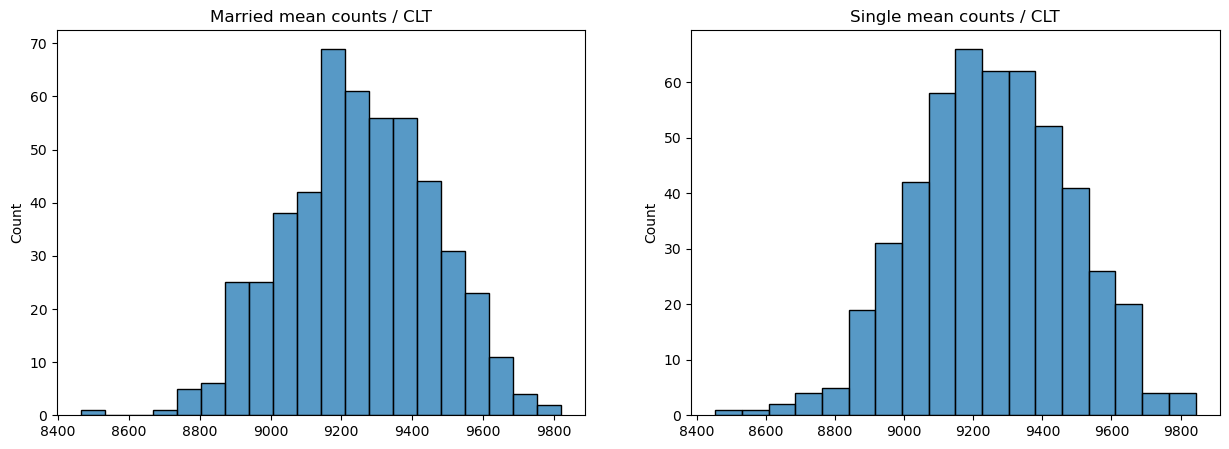

In [20]:
# Central limit theoren and plot

#data segregation
married_pur = df[df['Marital_Status'] == 1]['Purchase']
single_pur = df[df['Marital_Status'] == 0]['Purchase']

sample_size = 500
no_of_trails = 500
sample_mean_married = []
sample_mean_single = []

# married CLT
for i in range(no_of_trails):
    sm = married_pur.sample(sample_size).mean()
    sample_mean_married.append(sm)

# single CLT
for i in range(no_of_trails):
    sm = single_pur.sample(sample_size).mean()
    sample_mean_single.append(sm)
    
#plot
plt.figure(figsize = (15,5))

# Married hist
plt.subplot(1,2,1)    
sns.histplot(x = sample_mean_married)
plt.title('Married mean counts / CLT')

# Single Hist
plt.subplot(1,2,2)    
sns.histplot(x = sample_mean_single)
plt.title('Single mean counts / CLT')


In [102]:
# Central limit theorem, confidence interval is created for three sample size 50, 1000, 1500
uq_list_ms = df['Marital_Status'].unique()
for i in uq_list_ms:
    fdata = df[df['Marital_Status'] == i]['Purchase']
    print('Marital_Status =',i)
    filter_data_fn(fdata)
    print('--------------------------------------------------------------------------')

Marital_Status = 0
Sample size N = 50
Population mean = 9281 2
Standard_error = 729 2
90% confidence interval is [ 8082.49 , 10479.58 ]
95% confidence interval is [ 7852.89 , 10709.19 ]
99% confidence interval is [ 7404.13 , 11157.95 ]

Sample size N = 1000
Population mean = 9268 2
Standard_error = 161 2
90% confidence interval is [ 9002.74 , 9533.2 ]
95% confidence interval is [ 8951.93 , 9584.01 ]
99% confidence interval is [ 8852.62 , 9683.31 ]

Sample size N = 1500
Population mean = 9266 2
Standard_error = 129 2
90% confidence interval is [ 9054.38 , 9478.07 ]
95% confidence interval is [ 9013.79 , 9518.66 ]
99% confidence interval is [ 8934.47 , 9597.98 ]

--------------------------------------------------------------------------
Marital_Status = 1
Sample size N = 50
Population mean = 9267 2
Standard_error = 701 2
90% confidence interval is [ 8113.58 , 10421.09 ]
95% confidence interval is [ 7892.55 , 10642.12 ]
99% confidence interval is [ 7460.56 , 11074.11 ]

Sample size N = 10

## Age to Purchase analysis CLT and confidence interval
#### Insights:
    - To get lower width and more confident in the interval. choose bigger sample size.
    - With sample size 1500 and no of trails 1000, population of mean for all age bins is mentioned below:
        - Population mean = 8938 2, Standard_error = 124 2 --> Age bins = 0-17
        - Population mean = 9162 2, Standard_error = 131 2 --> Age bins = 18-25
        - Population mean = 9250 2, Standard_error = 129 2 --> Age bins = 26-35
        - Population mean = 9333 2, Standard_error = 127 2 --> Age bins = 36-45
        - Population mean = 9215 2, Standard_error = 127 2 --> Age bins = 46-50
        - Population mean = 9536 2, Standard_error = 124 2 --> Age bins = 51-55
        - Population mean = 9337 2, Standard_error = 126 2 --> Age bins = 55+
    - With above mentioned data, population mean increase as age increase and standard deviation is in +/-5 range.
    - Confidence interval data is mentioned below.
    
#### Recommendation :
    - Focus on higher age bins, as they tend to purchase more and offers , discounts can be provided to those to increase purchase.
    - add more products related to lower age bins, so even in these bins purchase can be increased.

### Central limit theorem

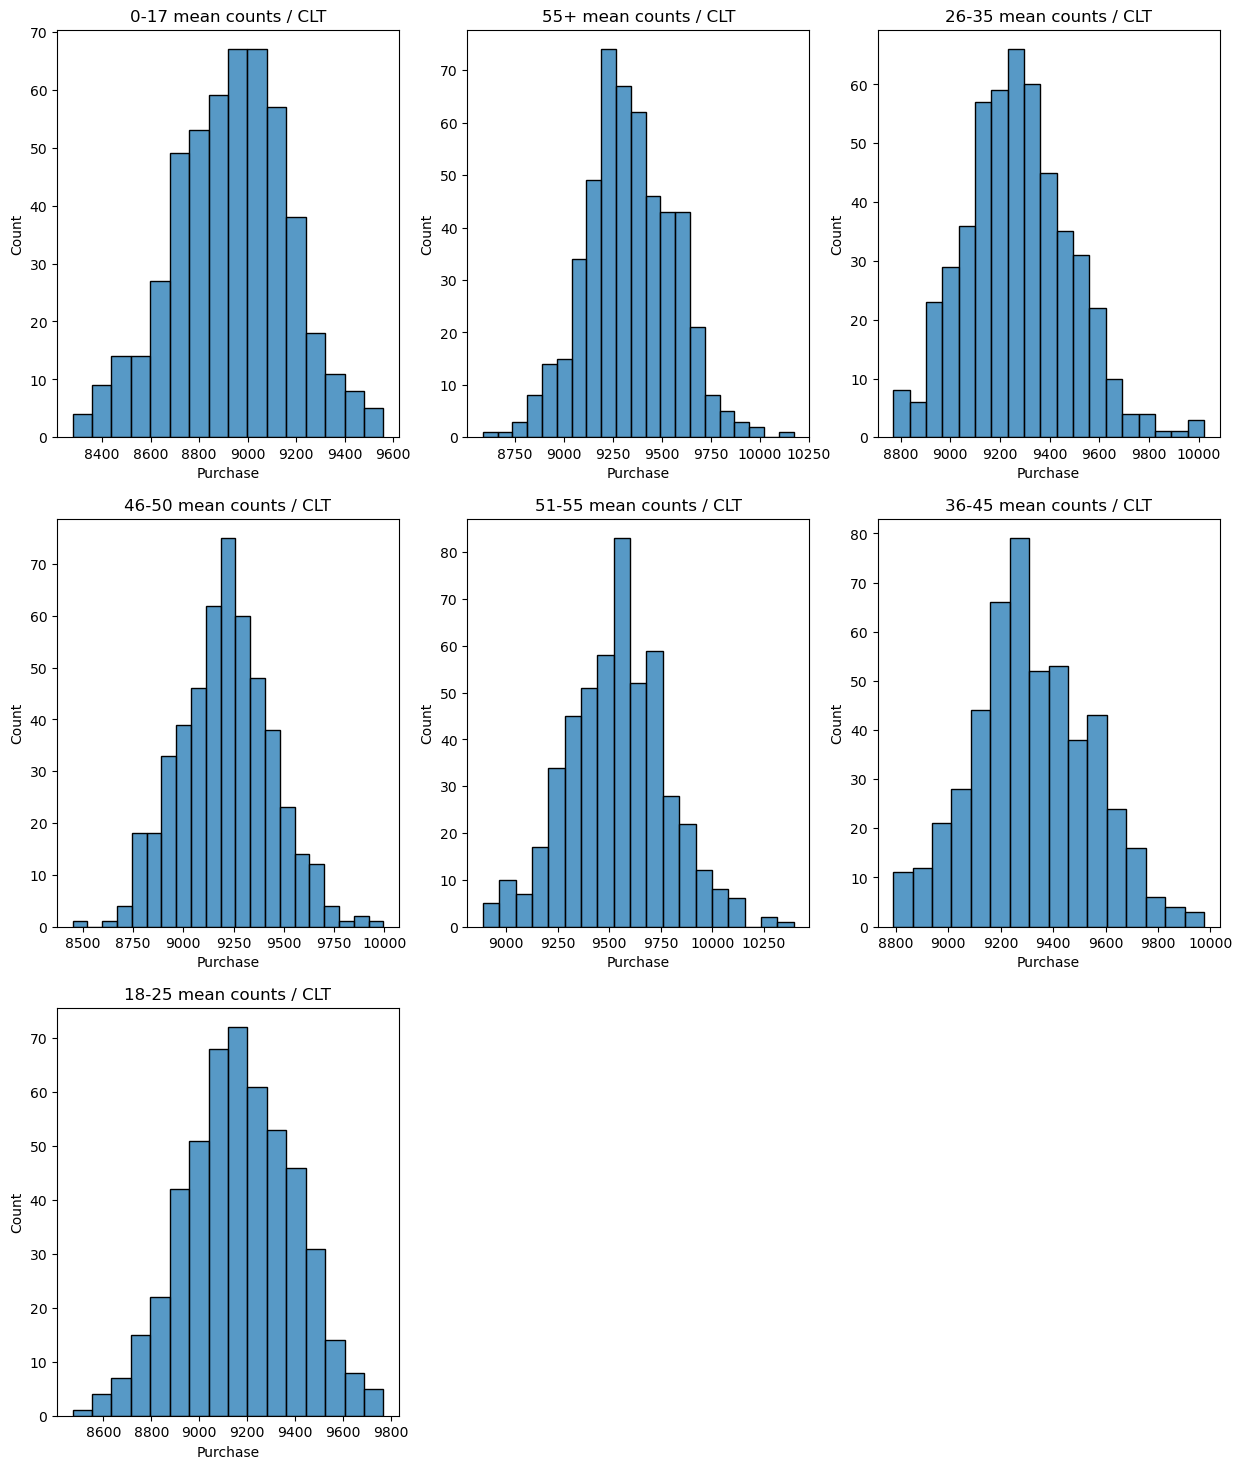

In [17]:
# CLT for all age bins
def age_fun(bins):
    pur_bins = df[df['Age'] == bins]['Purchase']
    sample_size = 500
    no_of_trails = 500
    sample_mean_bins = []
    
    for i in range(no_of_trails):
        sm = pur_bins.sample(sample_size).mean()
        sample_mean_bins.append(sm)
    
    return sample_mean_bins

input_bins = df['Age'].unique()
plt.figure(figsize = (15,18))
for j in range(len(input_bins)):
    out_sample_mean = age_fun(input_bins[j])
    plt.subplot(3,3,j+1)
    sns.histplot(x = out_sample_mean)
    plt.title(f'{input_bins[j]} mean counts / CLT')
    plt.xlabel('Purchase')

### Confidence interval for all age bins

In [103]:
# Central limit theorem, confidence interval is created for three sample size 50, 1000, 1500
uq_list_age = df['Age'].unique()
for i in uq_list_age:
    fdata = df[df['Age'] == i]['Purchase']
    print('Age bins =',i)
    filter_data_fn(fdata)
    print('--------------------------------------------------------------------------')

Age bins = 0-17
Sample size N = 50
Population mean = 8926 2
Standard_error = 726 2
90% confidence interval is [ 7731.61 , 10119.49 ]
95% confidence interval is [ 7502.88 , 10348.21 ]
99% confidence interval is [ 7055.85 , 10795.25 ]

Sample size N = 1000
Population mean = 8933 2
Standard_error = 157 2
90% confidence interval is [ 8675.53 , 9191.12 ]
95% confidence interval is [ 8626.14 , 9240.51 ]
99% confidence interval is [ 8529.62 , 9337.03 ]

Sample size N = 1500
Population mean = 8938 2
Standard_error = 124 2
90% confidence interval is [ 8735.07 , 9141.47 ]
95% confidence interval is [ 8696.14 , 9180.4 ]
99% confidence interval is [ 8620.06 , 9256.48 ]

--------------------------------------------------------------------------
Age bins = 55+
Sample size N = 50
Population mean = 9316 2
Standard_error = 719 2
90% confidence interval is [ 8133.69 , 10498.9 ]
95% confidence interval is [ 7907.14 , 10725.46 ]
99% confidence interval is [ 7464.35 , 11168.25 ]

Sample size N = 1000
Popul